In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import euclidean_distances

# Data Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Classification Models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# This file includes:
#  -> Cleaning of Data
#  -> Visualization of Data
#  -> Correlation of Numeric Data
#  -> Cross Tab for Categorical Data
#  -> HeatMap 
#  -> Data Encoding using Column Transformer
#  -> Model Training

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(950, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     947 non-null    float64
 2   Pclass       950 non-null    object 
 3   Name         950 non-null    object 
 4   Sex          949 non-null    object 
 5   Age          765 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        219 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 89.2+ KB


In [7]:
df.describe()

,PassengerId,Survived,Age,SibSp,ParCh,Fare
count,950.000000,947.000000,765.000000,950.000000,950.000000,948.000000
mean,475.500000,0.387540,29.810680,0.523158,6.020000,32.220415
std,274.385677,0.500288,14.520943,1.086846,122.890035,49.605518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,475.500000,0.000000,28.000000,0.000000,0.000000,14.458300
75%,712.750000,1.000000,39.000000,1.000000,0.000000,31.000000
max,950.000000,3.000000,80.000000,8.000000,2698.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              1
Age            185
SibSp            0
ParCh            0
Ticket           0
Fare             2
Cabin          731
Embarked         4
dtype: int64

In [9]:
null_row = df[df['Sex'].isnull()]
print(null_row)

     PassengerId  Survived             Pclass  Name  Sex  Age  SibSp  ParCh  \
920          921       3.0  Samaan, Mr. Elias  male  NaN  2.0      0   2662   

      Ticket  Fare Cabin Embarked  
920  21.6792   NaN     C      NaN  


In [10]:
df.drop(index=920, inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            185
SibSp            0
ParCh            0
Ticket           0
Fare             1
Cabin          731
Embarked         3
dtype: int64

In [12]:
num = df.columns[(df == 'Daher, Mr. Shedid').any()].tolist()
print(num)

['Pclass']


In [13]:
num1 = df[df['Pclass'] == 'Daher, Mr. Shedid']
print(num1)

     PassengerId  Survived             Pclass  Name   Sex  Age  SibSp  ParCh  \
918          919       3.0  Daher, Mr. Shedid  male  22.5  0.0      0   2698   

    Ticket  Fare Cabin Embarked  
918  7.225   NaN     C      NaN  


In [14]:
df.drop(index=918, inplace=True)

In [15]:
class_group = df.groupby('Pclass')['Age']
num = class_group.apply(lambda x: x.isnull().sum())
num1 = class_group.count()
print(num,'\n')
num1

Pclass
1     32
2     12
3    141
Name: Age, dtype: int64 



Pclass
1    200
2    183
3    380
Name: Age, dtype: int64

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\4216892978.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()


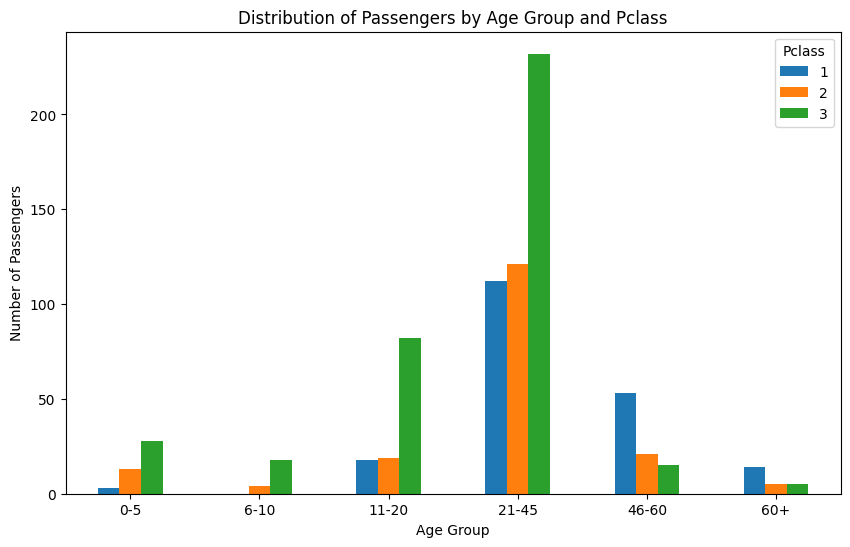

In [16]:
# bar chart for age and pclass

bins = [0,5,10,20,45,60,100]
labels = ['0-5','6-10','11-20','21-45','46-60','60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()

age_pclass_counts.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers by Age Group and Pclass")
plt.xticks(rotation=0)
plt.legend(title="Pclass")

plt.show()

In [17]:
mean_values = class_group.transform('mean')

df['Age'] = df['Age'].fillna(mean_values)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          731
Embarked         2
AgeGroup       185
dtype: int64

In [19]:
mode_values = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_values, inplace=True)

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\1845024266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_values, inplace=True)


In [20]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          731
Embarked         0
AgeGroup       185
dtype: int64

In [21]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27    5
G6             4
B96 B98        4
E101           3
F33            3
              ..
B36            1
A21            1
D34            1
A9             1
C31            1
Name: count, Length: 153, dtype: int64

In [22]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
df.drop('PassengerId',axis=1,inplace=True)

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45


In [25]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [26]:
df = df.reset_index(drop=True)

In [27]:
null_rows = df[df['Survived'].isnull()]
null_rows

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
310,NaN,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,21-45
313,NaN,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S,21-45
708,NaN,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,21-45


In [28]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [29]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45


In [30]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [31]:
df['SibSp'].dtypes

dtype('int64')

In [32]:
df['Family_Members'] = df['ParCh'] + df['SibSp']

In [33]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45,0


In [34]:
df['Family_Members'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [35]:
df.isnull().sum()

Survived            3
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
ParCh               0
Ticket              0
Fare                0
Cabin             731
Embarked            0
AgeGroup          185
Family_Members      0
dtype: int64

In [36]:
null_rows = df[df['Survived'].isnull()]
null_rows

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members
310,NaN,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,21-45,0
313,NaN,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S,21-45,0
708,NaN,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,21-45,0


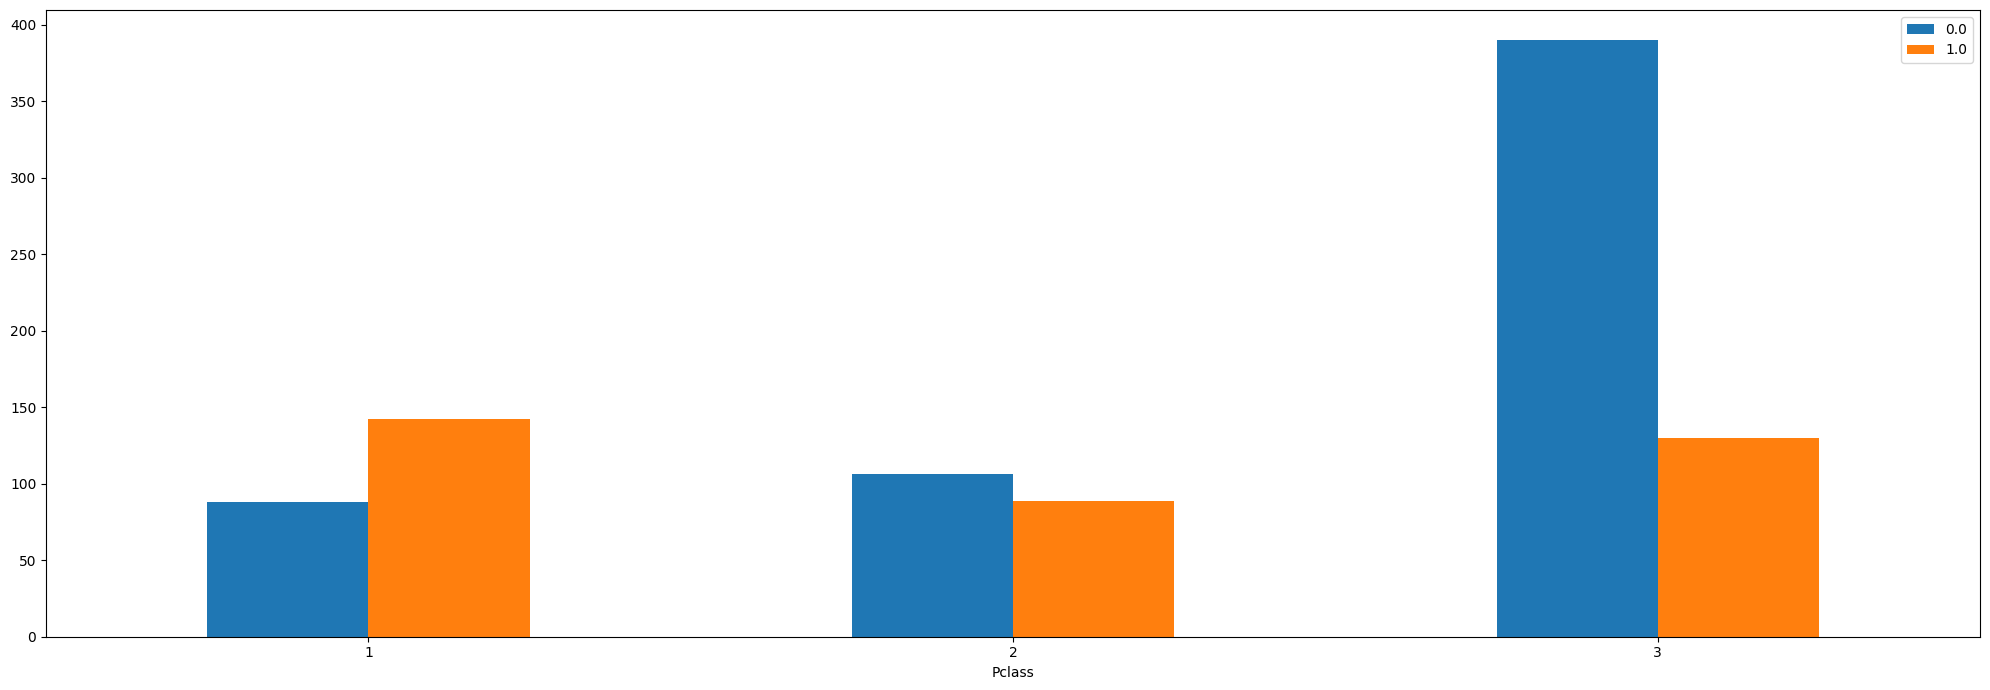

In [37]:
cabin_class_counts = df.groupby(['Pclass','Survived']).size().unstack()
cabin_class_counts.plot(kind='bar', figsize=(20,7))

plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
men_survived = (df[df['Sex']=='male']['Survived'].mean())*100
print('Percentage of Men Survived :',men_survived)

Percentage of Men Survived : 19.312602291325696


In [39]:
women_survived = (df[df['Sex']=='female']['Survived'].mean())*100
print('Percentage of Women Survived :',women_survived)

Percentage of Women Survived : 72.75449101796407


In [40]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,21-45,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,21-45,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,21-45,1
4,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,21-45,0
5,0.0,3,"Moran, Mr. James",male,25.33400,0,0,330877,8.4583,NaN,Q,NaN,0
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,46-60,0
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,0-5,4
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,21-45,2
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,11-20,1


In [42]:
df['Unique_Cabin'] = df['Cabin'].str[0]

In [43]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,21-45,1,NaN
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,21-45,1,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,21-45,1,C
4,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,21-45,0,NaN
5,0.0,3,"Moran, Mr. James",male,25.33400,0,0,330877,8.4583,NaN,Q,NaN,0,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,46-60,0,E
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,0-5,4,NaN
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,21-45,2,NaN
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,11-20,1,NaN


In [44]:
df['Unique_Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
cabin_num = df.groupby('Pclass')['Unique_Cabin'].value_counts()
cabin_num

Pclass  Unique_Cabin
1       C               62
        B               50
        D               32
        E               26
        A               17
        T                1
2       F                8
        D                4
        E                4
3       F                6
        G                4
        E                3
Name: count, dtype: int64

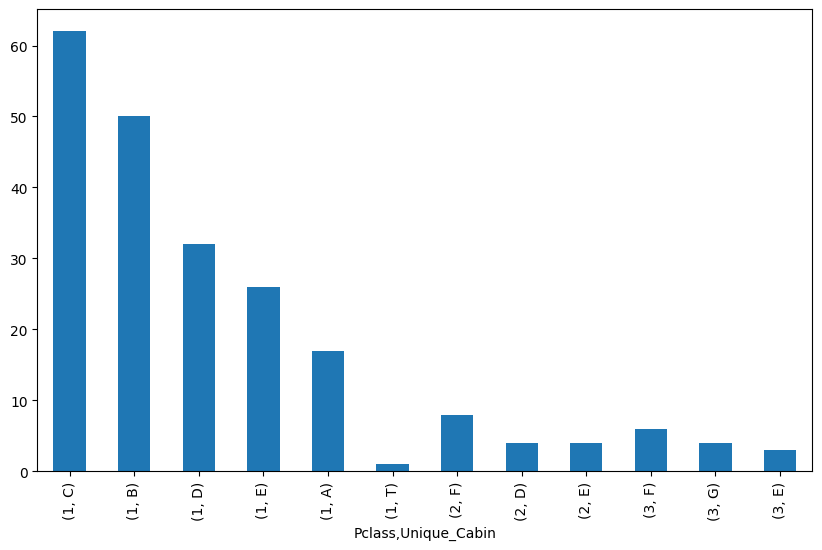

In [46]:
cabin_num.plot(kind='bar',figsize=(10,6))
plt.show()

In [47]:
df.shape

(948, 14)

In [48]:
least_frequent_values = df.groupby('Pclass')['Unique_Cabin'].apply(lambda x: x.value_counts().idxmin())

df['Unique_Cabin'].fillna(df['Pclass'].map(least_frequent_values), inplace=True)

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\3362187481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unique_Cabin'].fillna(df['Pclass'].map(least_frequent_values), inplace=True)


In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45,1,E
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45,1,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0,E
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45,1,C
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45,0,E


In [50]:
cabin_num = df.groupby('Pclass')['Unique_Cabin'].value_counts()
cabin_num

Pclass  Unique_Cabin
1       C                62
        B                50
        T                45
        D                32
        E                26
        A                17
2       D               183
        F                 8
        E                 4
3       E               511
        F                 6
        G                 4
Name: count, dtype: int64

In [51]:
men_survived = (df[df['Sex']=='male']['Survived'].mean())*100
men_dead = 100-men_survived

women_survived = (df[df['Sex']=='female']['Survived'].mean())*100
women_dead = 100-women_survived

print("-> Men survived: ",men_survived)
print("   Men Dead: ",men_dead,'\n')

print("-> Women survived: ",women_survived)
print("   Women Dead: ",women_dead)

-> Men survived:  19.312602291325696
   Men Dead:  80.6873977086743 

-> Women survived:  72.75449101796407
   Women Dead:  27.24550898203593


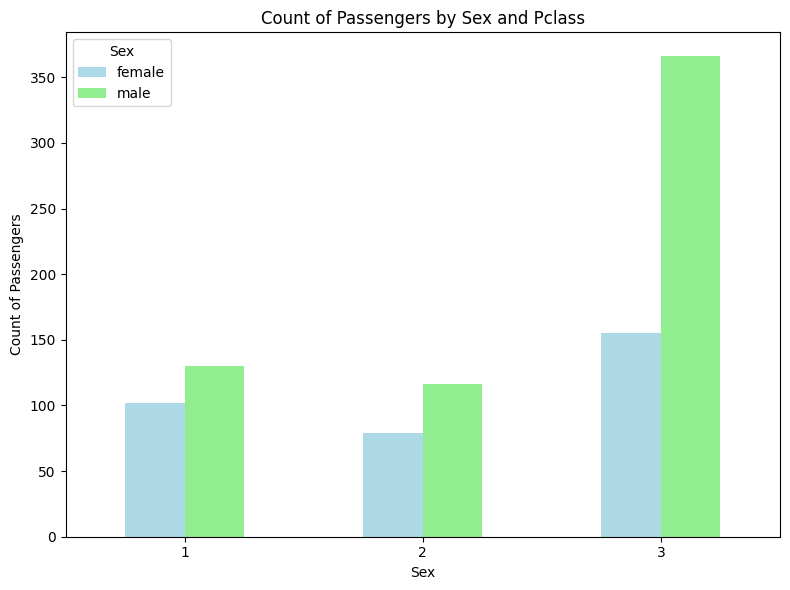

In [52]:
# bar chart to show men and women in pclass

group1 = df.groupby(['Pclass','Sex']).size().unstack()

group1.plot(kind='bar',figsize=(8,6), color=['lightblue', 'lightgreen', 'lightcoral'])

plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers by Sex and Pclass')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
women_in_1st_class = df[(df['Sex'] == 'female') & (df['Pclass'] == '1')].shape[0]
print(f"Number of Women in 1st class: {women_in_1st_class}")

Number of Women in 1st class: 102


In [54]:
df.isnull().sum()

Survived            3
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
ParCh               0
Ticket              0
Fare                0
Cabin             731
Embarked            0
AgeGroup          185
Family_Members      0
Unique_Cabin        0
dtype: int64

In [55]:
print(df['Sex'].unique(),'\n')
print(df['Pclass'].unique())

['male' 'female'] 

['3' '1' '2']


In [56]:
female_survived1 = (df[(df['Sex']=='female') & (df['Pclass']=='1')]['Survived'].mean())*100
female_survived2 = (df[(df['Sex']=='female') & (df['Pclass']=='2')]['Survived'].mean())*100
female_survived3 = (df[(df['Sex']=='female') & (df['Pclass']=='3')]['Survived'].mean())*100

print("Female Survived in 1st Class", female_survived1)
print("Female Survived in 2nd Class", female_survived2)
print("Female Survived in 3rd Class", female_survived3)

Female Survived in 1st Class 94.0
Female Survived in 2nd Class 89.87341772151899
Female Survived in 3rd Class 50.32258064516129


In [57]:
male_survived1 = (df[(df['Sex']=='male') & (df['Pclass']=='1')]['Survived'].mean())*100
male_survived2 = (df[(df['Sex']=='male') & (df['Pclass']=='2')]['Survived'].mean())*100
male_survived3 = (df[(df['Sex']=='male') & (df['Pclass']=='3')]['Survived'].mean())*100

print("Male Survived in 1st Class", male_survived1)
print("Male Survived in 2nd Class", male_survived2)
print("Male Survived in 3rd Class", male_survived3)

Male Survived in 1st Class 36.92307692307693
Male Survived in 2nd Class 15.517241379310345
Male Survived in 3rd Class 14.246575342465754


In [58]:
print(df['Age'].dtype)

float64


In [59]:
df['Age'] = df['Age'].astype(float)

In [60]:
df['Age'] = df['Age'].astype(int)

In [61]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,21-45,1,E
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,21-45,1,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0,E
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,21-45,1,C
4,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,21-45,0,E


In [62]:
childSurvived1 = (df[(df['Age']<18)&(df['Pclass']=='1')]['Survived'].mean())*100
childSurvived2 = (df[(df['Age']<18)&(df['Pclass']=='2')]['Survived'].mean())*100
childSurvived3 = (df[(df['Age']<18)&(df['Pclass']=='3')]['Survived'].mean())*100

print("Children Survived in 1st Class", childSurvived1)
print("Children Survived in 2nd Class", childSurvived2)
print("Children Survived in 3rd Class", childSurvived3)

Children Survived in 1st Class 91.66666666666666
Children Survived in 2nd Class 91.30434782608695
Children Survived in 3rd Class 38.2716049382716


In [63]:
oldSurvived1 = (df[(df['Age']>59)&(df['Pclass']=='1')]['Survived'].mean())*100
oldSurvived2 = (df[(df['Age']>59)&(df['Pclass']=='2')]['Survived'].mean())*100
oldSurvived3 = (df[(df['Age']>59)&(df['Pclass']=='3')]['Survived'].mean())*100

print("Old Survived in 1st Class", oldSurvived1)
print("Old Survived in 2nd Class", oldSurvived2)
print("Old Survived in 3rd Class", oldSurvived3)

Old Survived in 1st Class 33.33333333333333
Old Survived in 2nd Class 16.666666666666664
Old Survived in 3rd Class 20.0


In [64]:
# data visualization to understand data more properly

In [65]:
grouped_data = df.groupby(['Pclass','Sex']).size().unstack()

print(grouped_data)

Sex     female  male
Pclass              
1          102   130
2           79   116
3          155   366


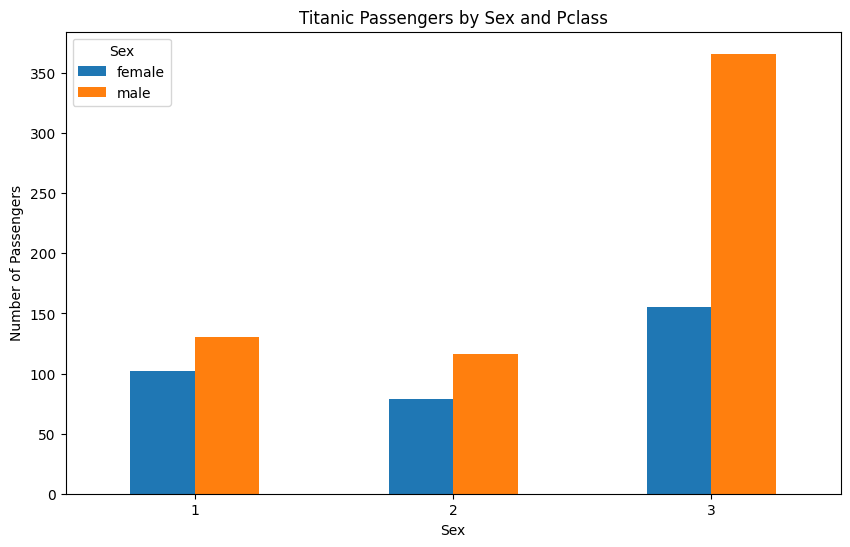

In [66]:
grouped_data.plot(kind='bar', figsize=(10,6))
plt.title("Titanic Passengers by Sex and Pclass")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()


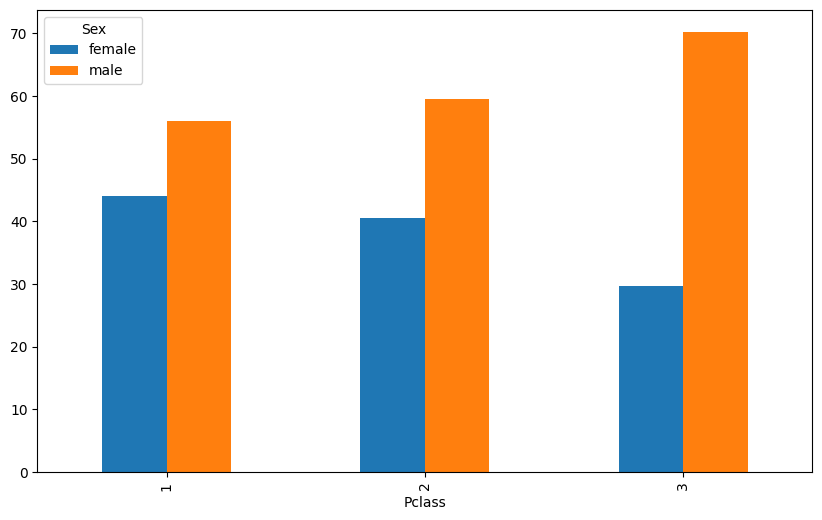

In [67]:
pclass_sex = df.groupby(['Pclass','Sex']).size().unstack()
pclass_sex = pclass_sex.div(pclass_sex.sum(axis=1),axis=0)*100

pclass_sex.plot(kind='bar', figsize=(10,6))
plt.show()

In [68]:
group2 = df.groupby(['Pclass','Survived']).size().unstack()
print(group2)

Survived  0.0  1.0
Pclass            
1          88  142
2         106   89
3         390  130


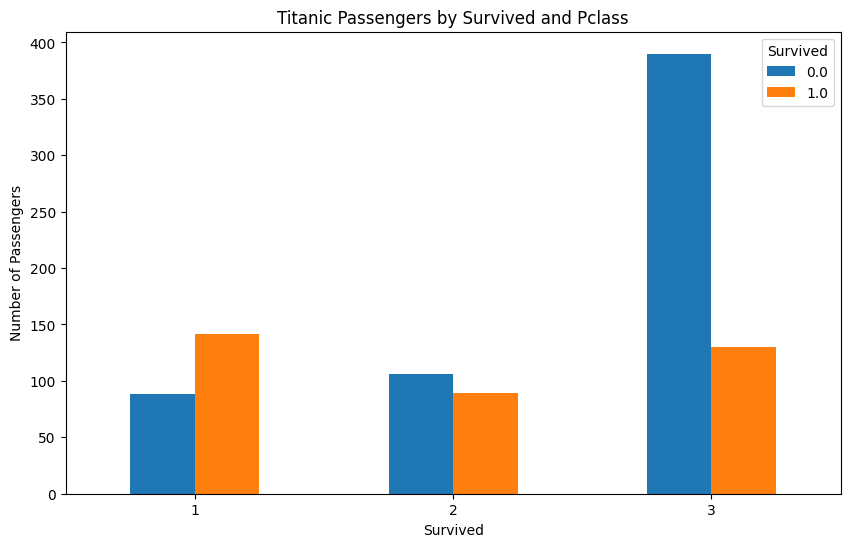

In [69]:
group2.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

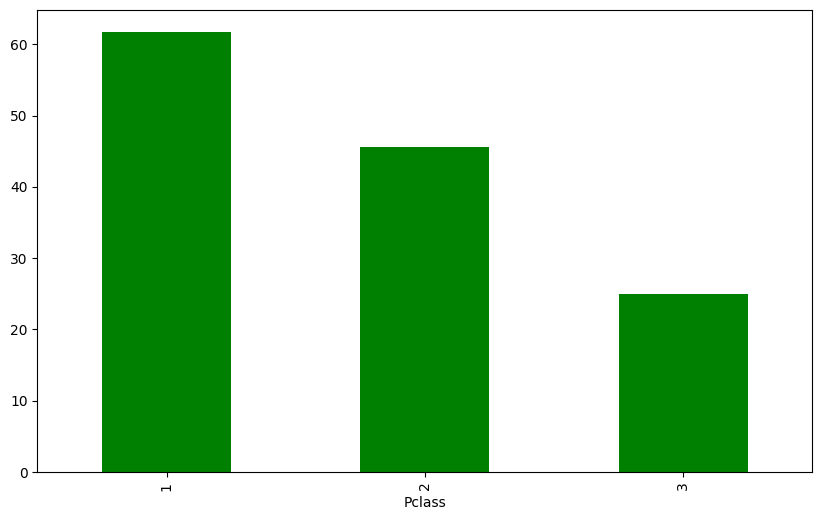

In [70]:
pclass_survived = df.groupby('Pclass')['Survived'].mean()*100
pclass_survived.plot(kind='bar', figsize=(10,6), color='green')
plt.show()

In [71]:
group3 = df.groupby(['Pclass','Sex','Survived']).size().unstack()
print(group3)

Survived       0.0  1.0
Pclass Sex             
1      female    6   94
       male     82   48
2      female    8   71
       male     98   18
3      female   77   78
       male    313   52


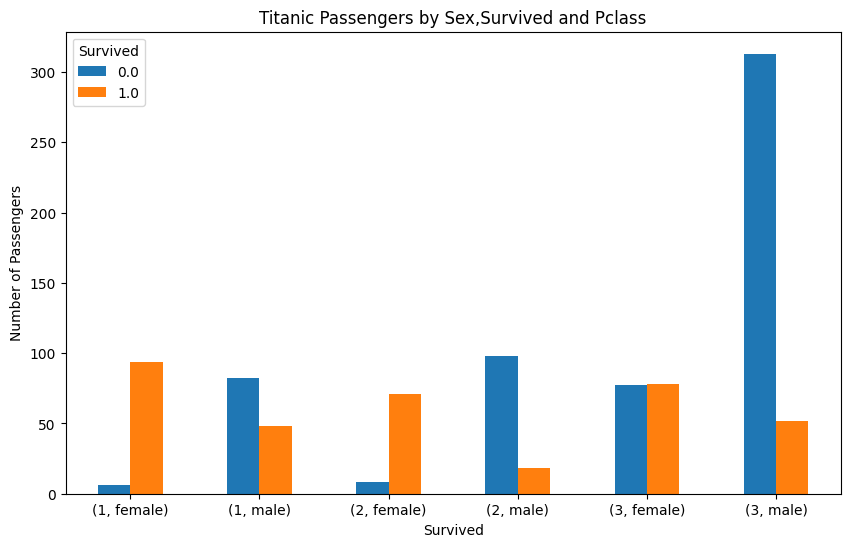

In [72]:
group3.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Sex,Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

In [73]:
group3 = df.groupby(['Pclass','Sex'])['Survived'].mean()*100
print(group3)

Pclass  Sex   
1       female    94.000000
        male      36.923077
2       female    89.873418
        male      15.517241
3       female    50.322581
        male      14.246575
Name: Survived, dtype: float64


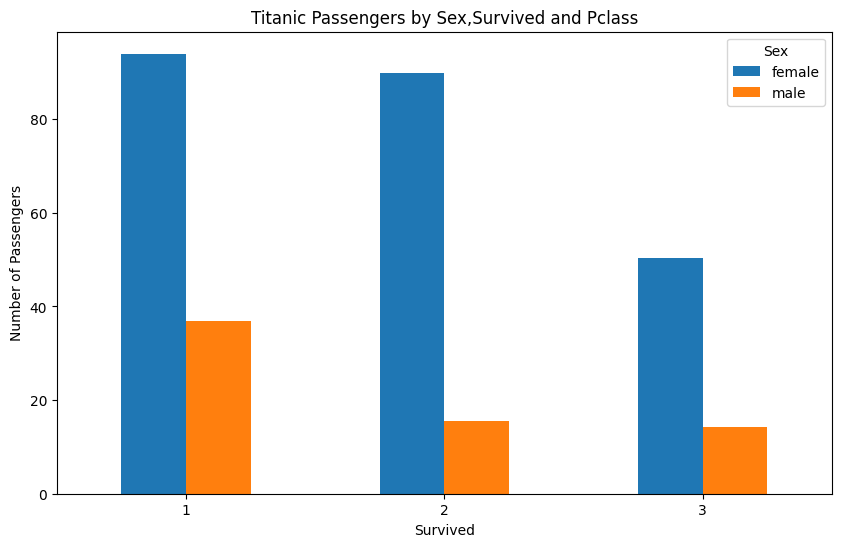

In [74]:
group3 = df.groupby(['Pclass','Sex'])['Survived'].mean()*100
group3 = group3.unstack()
group3.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Sex,Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

In [75]:
group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()
print(group4)

AgeGroup  0-5  6-10  11-20  21-45  46-60  60+
Pclass                                       
1           3     0     18    112     53   14
2          13     4     19    121     21    5
3          28    18     82    232     15    5


C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\60604633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()


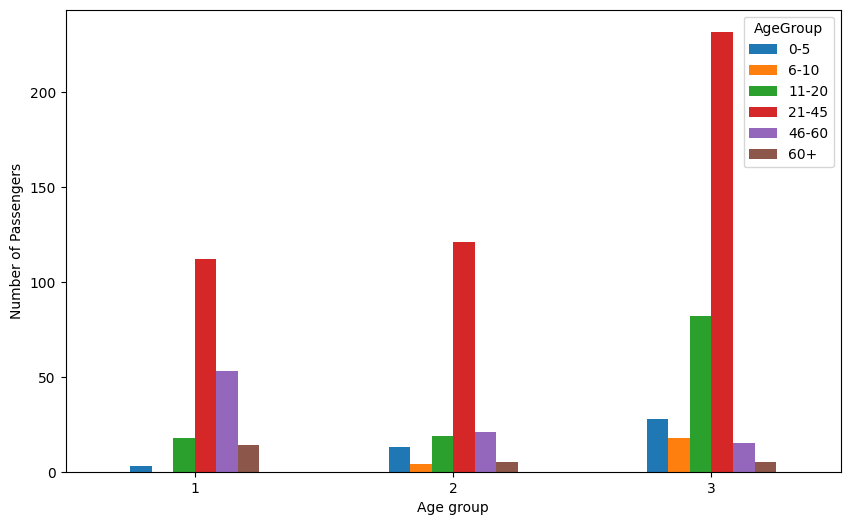

In [76]:
group4.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel("Age group")
plt.ylabel("Number of Passengers")
plt.show()

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\2972945625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()


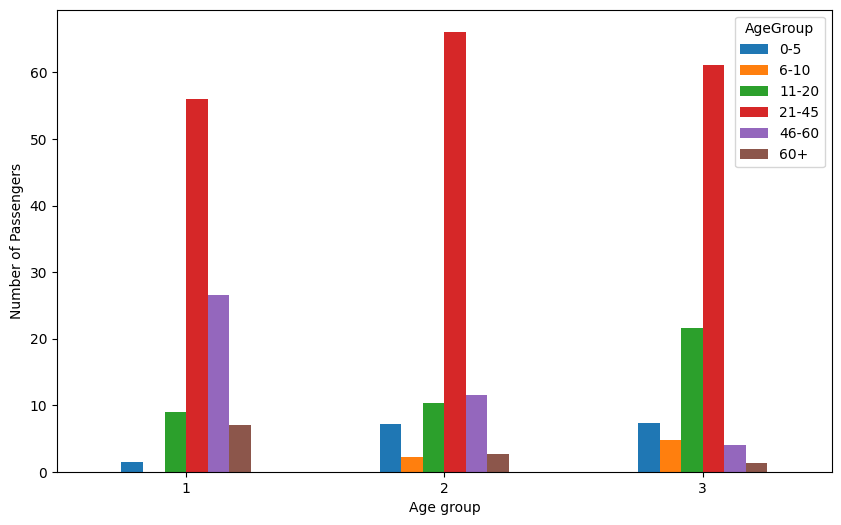

In [77]:
group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()
group4_percentage = group4.div(group4.sum(axis=1), axis=0) * 100
group4_percentage.plot(kind='bar', figsize=(10,6))

plt.xticks(rotation=0)
plt.xlabel("Age group")
plt.ylabel("Number of Passengers")
plt.show()

In [78]:
new_df = df[['Survived','Pclass','Age','AgeGroup','Unique_Cabin','SibSp','ParCh']]

In [79]:
new_df.head()

,Survived,Pclass,Age,AgeGroup,Unique_Cabin,SibSp,ParCh
0,0.0,3,22,21-45,E,1,0
1,1.0,1,38,21-45,C,1,0
2,1.0,3,26,21-45,E,0,0
3,1.0,1,35,21-45,C,1,0
4,0.0,3,35,21-45,E,0,0


In [80]:
new_df.columns

Index(['Survived', 'Pclass', 'Age', 'AgeGroup', 'Unique_Cabin', 'SibSp',
       'ParCh'],
      dtype='object')

In [81]:
new_df.shape

(948, 7)

In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      945 non-null    float64 
 1   Pclass        948 non-null    object  
 2   Age           948 non-null    int64   
 3   AgeGroup      763 non-null    category
 4   Unique_Cabin  948 non-null    object  
 5   SibSp         948 non-null    int64   
 6   ParCh         948 non-null    int64   
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 45.7+ KB


In [83]:
new_df.isnull().sum()

Survived          3
Pclass            0
Age               0
AgeGroup        185
Unique_Cabin      0
SibSp             0
ParCh             0
dtype: int64

In [84]:
numerical_df = df[['Survived','Pclass','Age','SibSp','ParCh','Sex','Family_Members']]

In [85]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        945 non-null    float64
 1   Pclass          948 non-null    object 
 2   Age             948 non-null    int64  
 3   SibSp           948 non-null    int64  
 4   ParCh           948 non-null    int64  
 5   Sex             948 non-null    object 
 6   Family_Members  948 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 52.0+ KB


In [86]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex,Family_Members
0,0.0,3,22,1,0,male,1
1,1.0,1,38,1,0,female,1
2,1.0,3,26,0,0,female,0
3,1.0,1,35,1,0,female,1
4,0.0,3,35,0,0,male,0


In [87]:
numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\1611486110.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})
C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\1611486110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})


In [220]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex,Family_Members
0,0.0,3,22,1,0,1,1
1,1.0,1,38,1,0,0,1
2,1.0,3,26,0,0,0,0
3,1.0,1,35,1,0,0,1
4,0.0,3,35,0,0,1,0


In [89]:
# Correlation
corr_matrix = numerical_df.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,ParCh,Sex,Family_Members
Survived,1.000000,-0.319736,-0.052873,-0.039736,0.084021,-0.525794,0.015030
Pclass,-0.319736,1.000000,-0.403098,0.073557,0.015069,0.130159,0.057788
Age,-0.052873,-0.403098,1.000000,-0.237627,-0.172623,0.072849,-0.248877
SibSp,-0.039736,0.073557,-0.237627,1.000000,0.411472,-0.115313,0.889296
ParCh,0.084021,0.015069,-0.172623,0.411472,1.000000,-0.250527,0.782743
Sex,-0.525794,0.130159,0.072849,-0.115313,-0.250527,1.000000,-0.204449
Family_Members,0.015030,0.057788,-0.248877,0.889296,0.782743,-0.204449,1.000000


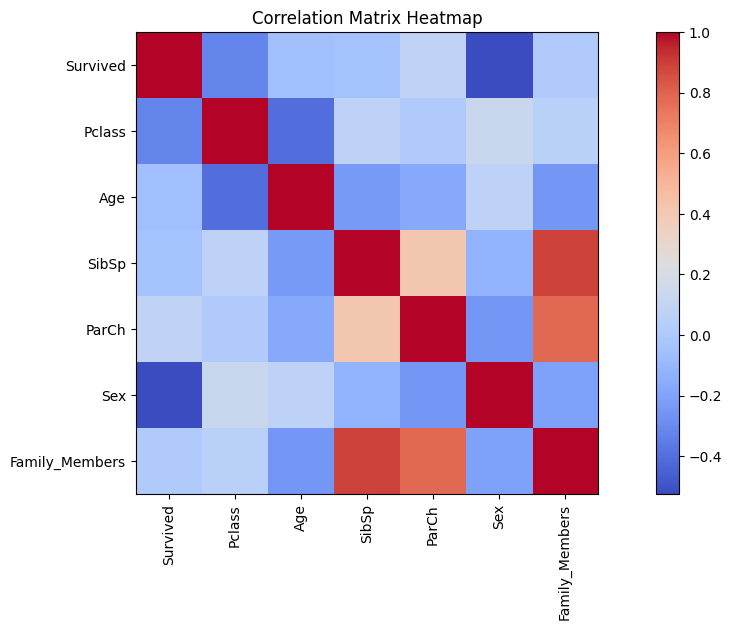

In [223]:
# HeatMap for numerical_df

fig, ax = plt.subplots(figsize=(15,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

plt.xticks(rotation=90)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [91]:
print(np.arange(len(corr_matrix.columns)))

[0 1 2 3 4 5 6]


In [92]:
cross_tab1 = pd.crosstab(df['Unique_Cabin'], df['SibSp'])
cross_tab1

SibSp,0,1,2,3,4,5,8
Unique_Cabin,,,,,,,
A,15,2,0,0,0,0,0
B,33,15,2,0,0,0,0
C,29,27,2,4,0,0,0
D,134,72,8,1,0,0,0
E,384,98,16,12,19,5,7
F,9,3,2,0,0,0,0
G,2,2,0,0,0,0,0
T,36,8,1,0,0,0,0


In [93]:
cross_tab2 = pd.crosstab(df['Unique_Cabin'], df['ParCh'])
cross_tab2

ParCh,0,1,2,3,4,5,6
Unique_Cabin,,,,,,,
A,16,0,1,0,0,0,0
B,29,12,8,1,0,0,0
C,45,6,10,0,1,0,0
D,160,36,17,2,0,0,0
E,422,61,46,3,3,5,1
F,8,5,1,0,0,0,0
G,0,3,1,0,0,0,0
T,42,3,0,0,0,0,0


In [94]:
new_df.head()

,Survived,Pclass,Age,AgeGroup,Unique_Cabin,SibSp,ParCh
0,0.0,3,22,21-45,E,1,0
1,1.0,1,38,21-45,C,1,0
2,1.0,3,26,21-45,E,0,0
3,1.0,1,35,21-45,C,1,0
4,0.0,3,35,21-45,E,0,0


In [95]:
new_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [96]:
new_df['ParCh'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [97]:
group5 = new_df.groupby(['Unique_Cabin','Survived']).size().unstack()
print(group5)

Survived      0.0  1.0
Unique_Cabin          
A               9    8
B              13   37
C              26   35
D             112  103
E             393  147
F               5    9
G               2    2
T              24   20


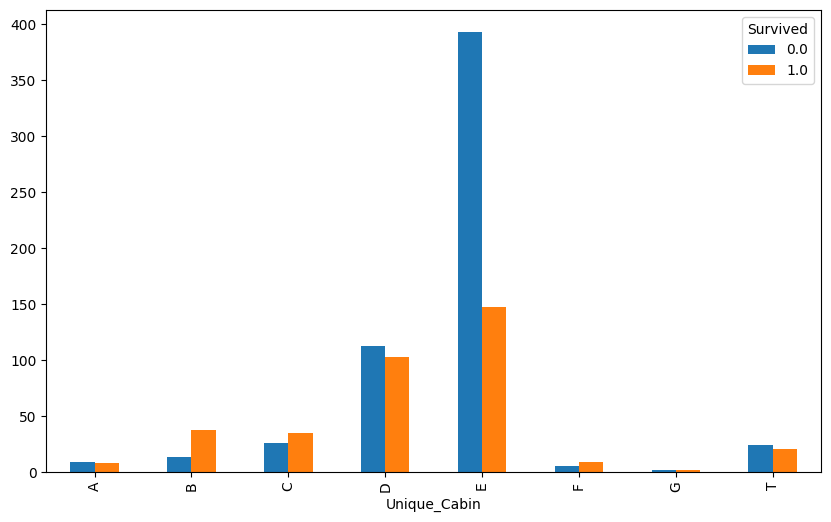

In [98]:
group5.plot(kind='bar', figsize=(10,6))
plt.show()

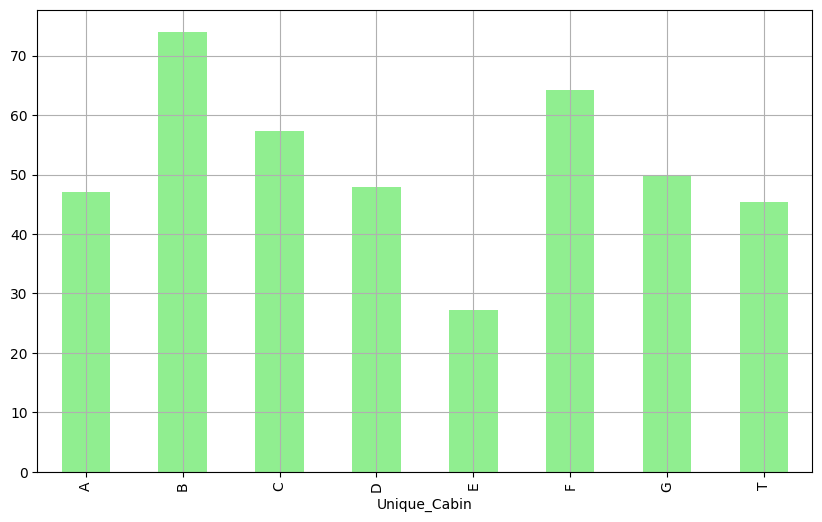

In [99]:
group5 = df.groupby('Unique_Cabin')['Survived'].mean()*100

group5.plot(kind='bar', figsize=(10,6), color='lightgreen')
plt.grid()
plt.show()

In [100]:
age_survived = df.groupby(['AgeGroup','Survived']).size().unstack()
print(age_survived)

Survived  0.0  1.0
AgeGroup          
0-5        13   31
6-10       14    8
11-20      72   47
21-45     281  181
46-60      54   35
60+        19    5


C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\663411117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby(['AgeGroup','Survived']).size().unstack()


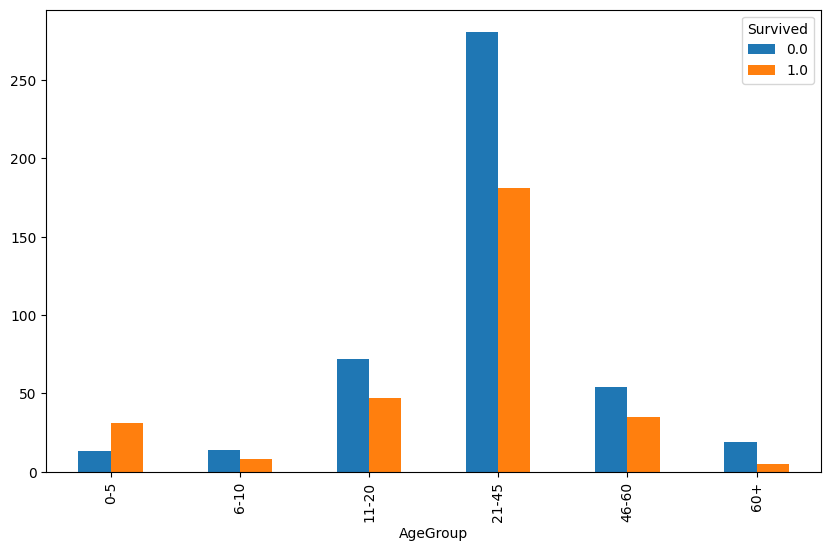

In [101]:
age_survived.plot(kind='bar', figsize=(10,6))
plt.show()

In [102]:
age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].size().unstack()
print(age_survived_class)

AgeGroup  0-5  6-10  11-20  21-45  46-60  60+
Pclass                                       
1           3     0     18    112     53   14
2          13     4     19    121     21    5
3          28    18     82    232     15    5


C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\4244048716.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].size().unstack()


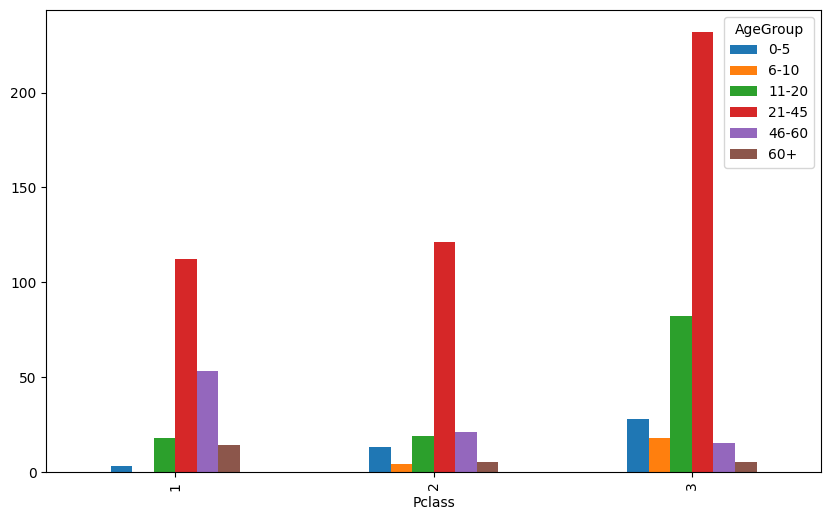

In [103]:
age_survived_class.plot(kind='bar', figsize=(10,6))
plt.show()

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18004\1284245739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()*100


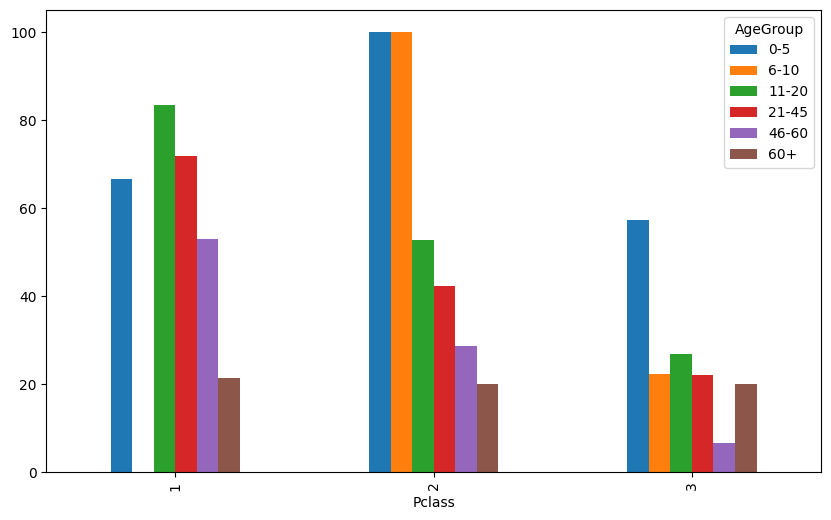

In [104]:
age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()*100
age_survived_class = age_survived_class.unstack()

age_survived_class.plot(kind='bar', figsize=(10,6))
plt.show()

In [105]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Members,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,21-45,1,E
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,21-45,1,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,0,E
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,21-45,1,C
4,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,21-45,0,E


In [106]:
df.drop(['Name','Ticket','Fare','Cabin','Unique_Cabin'],axis=1,inplace=True)

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,0.0,3,male,22,1,0,S,21-45,1
1,1.0,1,female,38,1,0,C,21-45,1
2,1.0,3,female,26,0,0,S,21-45,0
3,1.0,1,female,35,1,0,S,21-45,1
4,0.0,3,male,35,0,0,S,21-45,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        945 non-null    float64 
 1   Pclass          948 non-null    object  
 2   Sex             948 non-null    object  
 3   Age             948 non-null    int64   
 4   SibSp           948 non-null    int64   
 5   ParCh           948 non-null    int64   
 6   Embarked        948 non-null    object  
 7   AgeGroup        763 non-null    category
 8   Family_Members  948 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 60.5+ KB


In [109]:
df.isnull().sum()

Survived            3
Pclass              0
Sex                 0
Age                 0
SibSp               0
ParCh               0
Embarked            0
AgeGroup          185
Family_Members      0
dtype: int64

In [110]:
df['AgeGroup'].unique()

['21-45', NaN, '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']

In [111]:
df.dropna(inplace=True)

In [112]:
df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
ParCh             0
Embarked          0
AgeGroup          0
Family_Members    0
dtype: int64

In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,0.0,3,male,22,1,0,S,21-45,1
1,1.0,1,female,38,1,0,C,21-45,1
2,1.0,3,female,26,0,0,S,21-45,0
3,1.0,1,female,35,1,0,S,21-45,1
4,0.0,3,male,35,0,0,S,21-45,0


In [114]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [115]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,0.0,3,male,22,1,0,S,21-45,1
1,1.0,1,female,38,1,0,C,21-45,1
2,1.0,3,female,26,0,0,S,21-45,0
3,1.0,1,female,35,1,0,S,21-45,1
4,0.0,3,male,35,0,0,S,21-45,0


In [116]:
print(df['AgeGroup'].unique())

['21-45', '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']


In [117]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,0.0,3,male,22,1,0,S,21-45,1
1,1.0,1,female,38,1,0,C,21-45,1
2,1.0,3,female,26,0,0,S,21-45,0
3,1.0,1,female,35,1,0,S,21-45,1
4,0.0,3,male,35,0,0,S,21-45,0


In [118]:
df = df.reset_index(drop=True)

In [119]:
target_df = df['Survived']

In [120]:
target_df.shape

(760,)

In [121]:
target_df.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [122]:
df.drop('Survived',axis=1,inplace=True)

In [123]:
df.drop('Age', axis=1, inplace=True)

In [124]:
df.head()

,Pclass,Sex,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,3,male,1,0,S,21-45,1
1,1,female,1,0,C,21-45,1
2,3,female,0,0,S,21-45,0
3,1,female,1,0,S,21-45,1
4,3,male,0,0,S,21-45,0


In [125]:
df['AgeGroup'].unique()

['21-45', '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']

In [126]:
df['Pclass'].unique()

array(['3', '1', '2'], dtype=object)

In [127]:
df.isnull().sum()

Pclass            0
Sex               0
SibSp             0
ParCh             0
Embarked          0
AgeGroup          0
Family_Members    0
dtype: int64

In [128]:
target_df.isnull().sum()

np.int64(0)

In [129]:
# Splitting the data

X = df
y = target_df

In [130]:
X.head()

,Pclass,Sex,SibSp,ParCh,Embarked,AgeGroup,Family_Members
0,3,male,1,0,S,21-45,1
1,1,female,1,0,C,21-45,1
2,3,female,0,0,S,21-45,0
3,1,female,1,0,S,21-45,1
4,3,male,0,0,S,21-45,0


In [131]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pclass          760 non-null    object  
 1   Sex             760 non-null    object  
 2   SibSp           760 non-null    int64   
 3   ParCh           760 non-null    int64   
 4   Embarked        760 non-null    object  
 5   AgeGroup        760 non-null    category
 6   Family_Members  760 non-null    int64   
dtypes: category(1), int64(3), object(3)
memory usage: 36.7+ KB


In [133]:
df['Pclass'] = df['Pclass'].astype(str)

In [134]:
if (df['Pclass'] == '1').any():
    print(True)
else:
    print(False)

True


In [135]:
df['AgeGroup'].unique()

['21-45', '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']

<font size="6" color='pink'>Data Splitting</font>

In [224]:
print('X Train Length: ',len(X_train))
print('X Test Length: ',len(X_test))
print('y Train Length: ',len(y_train))
print('y Test Length: ',len(y_test))

X Train Length:  608
X Test Length:  152
y Train Length:  608
y Test Length:  152


In [138]:
# After splitting the data, i'll encode it in numerical form using Column Transformer for model Training
transformer = ColumnTransformer(transformers = [
    ('t1', OneHotEncoder(sparse_output=False, drop='first'),['Sex','Embarked']),
    ('t2', OrdinalEncoder(categories=[['3','2','1']]),['Pclass']),
    ('t3', OrdinalEncoder(categories=[['0-5','6-10','11-20','21-45','46-60','60+']]),['AgeGroup'])
], remainder = 'passthrough')

In [139]:
X_train = transformer.fit_transform(X_train)

In [140]:
type(y_test)

pandas.core.series.Series

In [141]:
type(y_train)

pandas.core.series.Series

In [142]:
X_test = transformer.transform(X_test)

In [143]:
le = LabelEncoder()

In [144]:
le.fit(y_train)

LabelEncoder()

In [145]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [146]:
type(X_train)

numpy.ndarray

In [147]:
len(X_train)

608

In [148]:
type(y_train)

numpy.ndarray

In [149]:
type(y_test)

numpy.ndarray

In [150]:
X_train[:5]

array([[1., 0., 1., 0., 3., 0., 0., 0.],
       [1., 0., 1., 1., 3., 0., 0., 0.],
       [1., 0., 1., 1., 3., 0., 0., 0.],
       [1., 0., 0., 0., 2., 0., 0., 0.],
       [1., 0., 1., 0., 3., 0., 0., 0.]])

In [151]:
y_train[:5]

array([0, 0, 0, 0, 1])

In [152]:
type(X_test)

numpy.ndarray

In [153]:
type(y_train)

numpy.ndarray

<font size="6" color='pink'>Model Training</font>

In [154]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [155]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [156]:
len(y_pred_lr)

152

In [157]:
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)*100
print(f"Accuracy is {accuracy_lr}%")

Accuracy is 81.57894736842105%


In [158]:
# Precision
precision_lr = precision_score(y_test, y_pred_lr)*100
print(f"Precision is {precision_lr}%")

Precision is 82.35294117647058%


In [159]:
# Recall
recall_lr = recall_score(y_test, y_pred_lr)*100
print(f"Recall is {recall_lr}%")

Recall is 68.85245901639344%


In [160]:
# F1-Score
f1_score_lr = f1_score(y_test, y_pred_lr)*100
print(f"F1-Score is {f1_score_lr}%")

F1-Score is 75.0%


In [161]:
# Confusion Matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print()
diagram_lr = [['TP','FN'],['FP','TN']]
for row in diagram_lr:
    print(row)

[[82  9]
 [19 42]]

['TP', 'FN']
['FP', 'TN']


Decision Tree

In [162]:
model_dt = DecisionTreeClassifier()

In [163]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [164]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [165]:
len(y_pred_dt)

152

In [166]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
print(f"Accuracy is {accuracy_dt}%")

Accuracy is 76.31578947368422%


In [167]:
# Precision
precision_dt = precision_score(y_test, y_pred_dt)*100
print(f"Precision is {precision_dt}%")

Precision is 83.78378378378379%


In [168]:
# Recall
recall_dt = recall_score(y_test, y_pred_dt)*100
print(f"Recall is {recall_dt}%")

Recall is 50.81967213114754%


In [169]:
# F1-Score
f1_score_dt = f1_score(y_test, y_pred_dt)*100
print(f"F1-Score is {f1_score_dt}%")

F1-Score is 63.26530612244898%


In [170]:
# Confusion Matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print()

diagram_dt = [['TP','FN'],['FP','TN']]
for row in diagram_dt:
    print(row)

[[85  6]
 [30 31]]

['TP', 'FN']
['FP', 'TN']


In [171]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        91
           1       0.84      0.51      0.63        61

    accuracy                           0.76       152
   macro avg       0.79      0.72      0.73       152
weighted avg       0.78      0.76      0.75       152



In [172]:
model_rf = RandomForestClassifier()

In [173]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [174]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [175]:
len(y_pred_rf)

152

In [176]:
# Evaluation

In [177]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Accuracy is {accuracy_rf}%")

Accuracy is 77.63157894736842%


In [178]:
# Precision
precision_rf = precision_score(y_test, y_pred_rf)*100
print(f"Precision is {precision_rf}%")

Precision is 86.48648648648648%


In [179]:
# Recall
recall_rf = recall_score(y_test, y_pred_rf)*100
print(f"Recall is {recall_rf}%")

Recall is 52.459016393442624%


In [180]:
# F1-Score
f1_score_rf = f1_score(y_test, y_pred_rf)*100
print(f"F1-Score is {f1_score_rf}%")

F1-Score is 65.3061224489796%


In [181]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print()

diagram_rf = [['TP','FN'],['FP','TN']]
for row in diagram_rf:
    print(row)

[[86  5]
 [29 32]]

['TP', 'FN']
['FP', 'TN']


In [182]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.83        91
           1       0.86      0.52      0.65        61

    accuracy                           0.78       152
   macro avg       0.81      0.73      0.74       152
weighted avg       0.79      0.78      0.76       152



In [183]:
# using sqrt
neighbors = np.sqrt(len(X_train))
neighbors = neighbors.astype(int)
neighbors

np.int64(24)

In [184]:
# using euclidean_distances
neighbors_ed = euclidean_distances(X_train)
neighbors_ed

array([[0.        , 1.        , 1.        , ..., 2.64575131, 2.        ,
        1.41421356],
       [1.        , 0.        , 0.        , ..., 2.44948974, 1.73205081,
        1.        ],
       [1.        , 0.        , 0.        , ..., 2.44948974, 1.73205081,
        1.        ],
       ...,
       [2.64575131, 2.44948974, 2.44948974, ..., 0.        , 3.        ,
        1.73205081],
       [2.        , 1.73205081, 1.73205081, ..., 3.        , 0.        ,
        2.        ],
       [1.41421356, 1.        , 1.        , ..., 1.73205081, 2.        ,
        0.        ]], shape=(608, 608))

In [185]:
model_nn = KNeighborsClassifier(n_neighbors = neighbors) # 5 neighbors by default

In [186]:
model_nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(24))

In [187]:
y_pred_nn = model_nn.predict(X_test)
print(y_pred_nn)

[0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0]


In [188]:
len(y_pred_nn)

152

In [189]:
# Accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)*100
print(f"Accuracy is {accuracy_nn}%")

Accuracy is 78.94736842105263%


In [190]:
# Precision
precision_nn = precision_score(y_test, y_pred_nn)*100
print(f"Precision is {precision_nn}%")

Precision is 87.17948717948718%


In [191]:
# Recall
recall_nn = recall_score(y_test, y_pred_nn)*100
print(f"Recall is {recall_nn}%")

Recall is 55.73770491803278%


In [192]:
# F1-Score
f1_score_nn = f1_score(y_test, y_pred_nn)*100
print(f"F1-Score is {f1_score_nn}%")

F1-Score is 68.0%


In [193]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print(cm_nn)
print()

diagram_nn = [['TP','FN'],['FP','TN']]
for row in diagram_nn:
    print(row)

[[86  5]
 [27 34]]

['TP', 'FN']
['FP', 'TN']


In [194]:
print('Classification Report:')
print(classification_report(y_test, y_pred_nn))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        91
           1       0.87      0.56      0.68        61

    accuracy                           0.79       152
   macro avg       0.82      0.75      0.76       152
weighted avg       0.81      0.79      0.78       152



In [195]:
model_svm = SVC()

In [196]:
model_svm.fit(X_train, y_train)

SVC()

In [197]:
y_pred_svm = model_svm.predict(X_test)
print(y_pred_svm)

[0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]


In [198]:
len(y_pred_svm)

152

In [199]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print(f"Accuracy is {accuracy_svm}%")

Accuracy is 84.21052631578947%


In [200]:
# Precision
precision_svm = precision_score(y_test, y_pred_svm)*100
print(f"Precision is {precision_svm}%")

Precision is 86.27450980392157%


In [201]:
# Recall
recall_svm = recall_score(y_test, y_pred_svm)*100
print(f"Recall is {recall_svm}%")

Recall is 72.1311475409836%


In [202]:
# F1-Score
f1_score_svm = f1_score(y_test, y_pred_svm)*100
print(f"F1-Score is {f1_score_svm}%")

F1-Score is 78.57142857142857%


In [203]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print()

diagram_svm = [['TP','FN'],['FP','TN']]
for row in diagram_svm:
    print(row)

[[84  7]
 [17 44]]

['TP', 'FN']
['FP', 'TN']


In [204]:
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        91
           1       0.86      0.72      0.79        61

    accuracy                           0.84       152
   macro avg       0.85      0.82      0.83       152
weighted avg       0.84      0.84      0.84       152



In [205]:
model_nb = GaussianNB()

In [206]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [207]:
y_pred_nb = model_nb.predict(X_test)
print(y_pred_nb)

[0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]


In [208]:
len(y_pred_nb)

152

In [209]:
# Evaluation

In [210]:
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)*100
print(f"Accuracy is {accuracy_nb}%")

Accuracy is 77.63157894736842%


In [211]:
# Precision
precision_nb = precision_score(y_test, y_pred_nb)*100
print(f"Precision is {precision_nb}%")

Precision is 70.76923076923077%


In [212]:
# Recall
recall_nb = recall_score(y_test, y_pred_nb)*100
print(f"Recall is {recall_nb}%")

Recall is 75.40983606557377%


In [213]:
# F1-Score
f1_score_nb = f1_score(y_test, y_pred_nb)*100
print(f"F1-Score is {f1_score_nb}%")

F1-Score is 73.01587301587301%


In [214]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
print()

diagram_nb = [['TP','FN'],['FP','TN']]
for row in diagram_nb:
    print(row)

[[72 19]
 [15 46]]

['TP', 'FN']
['FP', 'TN']


In [215]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        91
           1       0.71      0.75      0.73        61

    accuracy                           0.78       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.78      0.78      0.78       152



Visualization

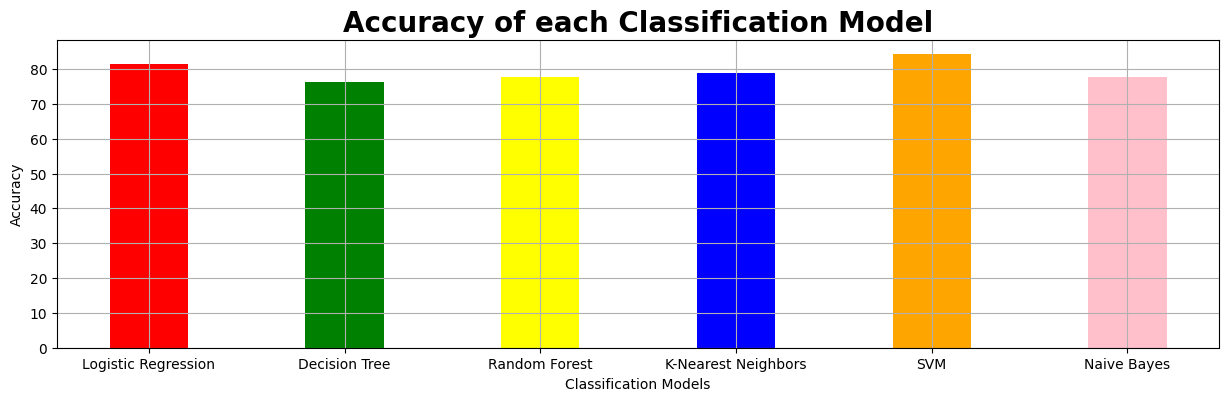

In [216]:
# for accuracy
data = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_nn, accuracy_svm, accuracy_nb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes']
colors = ['red','green','yellow','blue','orange','pink']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("Accuracy of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

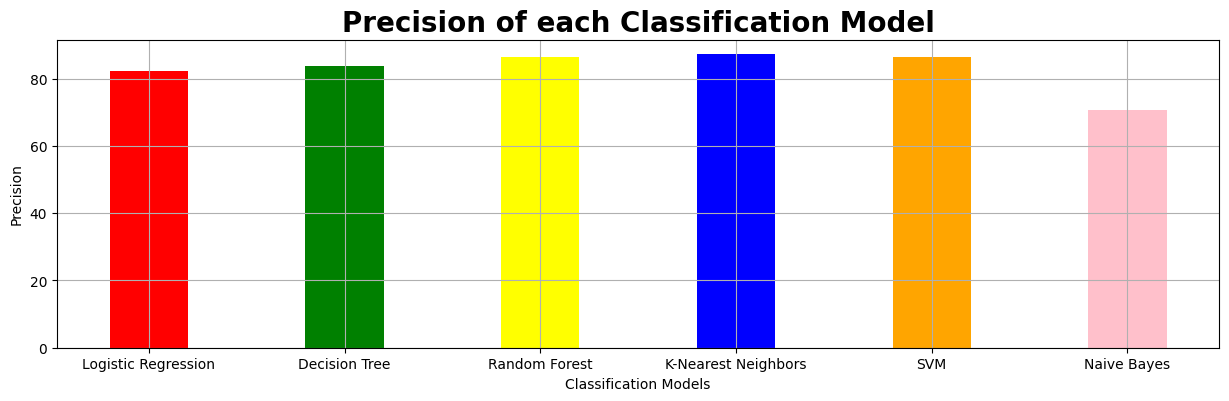

In [217]:
# for precision
data = [precision_lr, precision_dt, precision_rf, precision_nn, precision_svm, precision_nb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes']
colors = ['red','green','yellow','blue','orange','pink']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Precision")
plt.xlabel("Classification Models")
plt.title("Precision of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

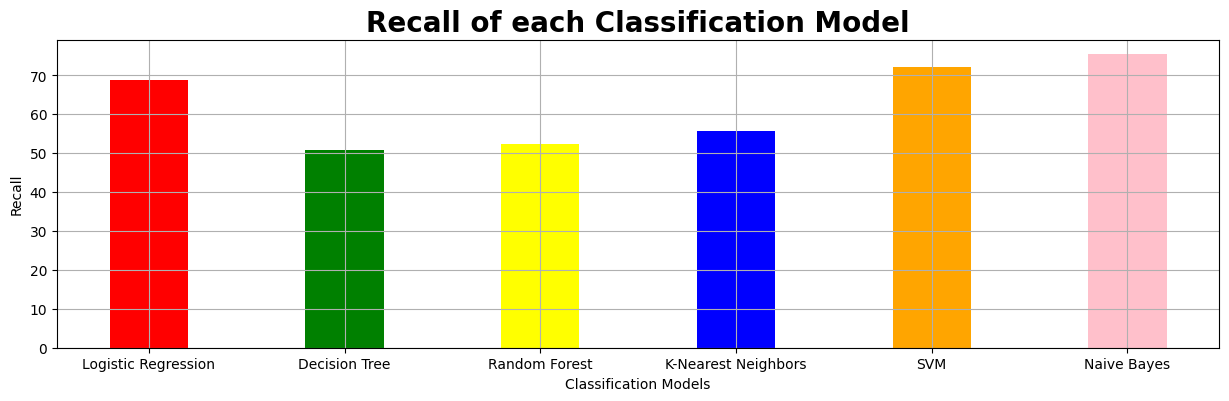

In [218]:
# for recall
data = [recall_lr, recall_dt, recall_rf, recall_nn, recall_svm, recall_nb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes']
colors = ['red','green','yellow','blue','orange','pink']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Recall")
plt.xlabel("Classification Models")
plt.title("Recall of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

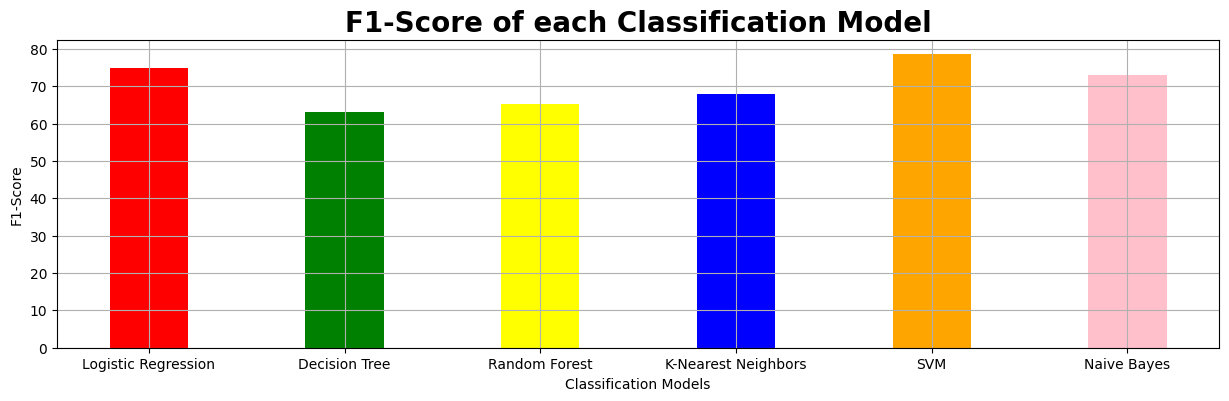

In [219]:
# for f1-score
data = [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_nn, f1_score_svm, f1_score_nb]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes']
colors = ['red','green','yellow','blue','orange','pink']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("F1-Score")
plt.xlabel("Classification Models")
plt.title("F1-Score of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()